In [ ]:
# @title
# import tensoflow and other libraries
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization)
import matplotlib.pyplot as plt
import numpy as  np
%matplotlib inline

In [ ]:
# @title
# Network parameters

NUM_CLASSES = 10

#reshape 28x28 pixel images to a "flatten" array of 784 pixels
RESHAPED = 784

#Number of neurons in a hidden layer
HIDDEN_NUERONS = 256

IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [ ]:
# @title
# load the fashion MNIST dataset
fashion_data = tf.keras.datasets.fashion_mnist

#split between 60,000 train samples and 10,000 test samples
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

# Reshape the images to have the correct shape for the CNN
train_images = train_images.reshape(train_images.shape[0], IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(test_images.shape[0], IMG_ROWS, IMG_COLS, 1)

train_images, test_images = train_images/255.0, test_images/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


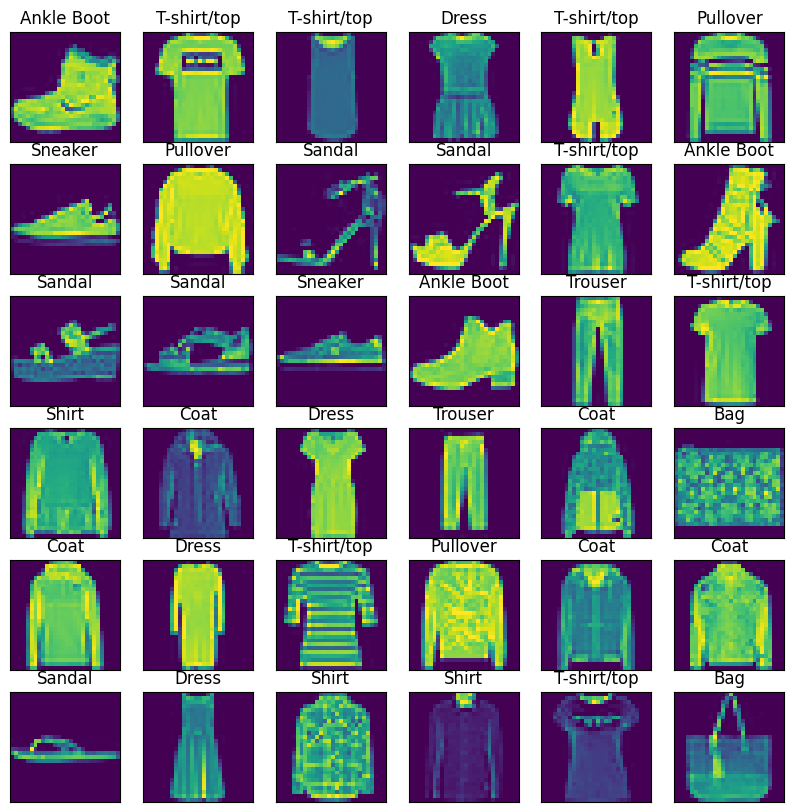

In [ ]:
# @title
# Visualization

# Create a dictionary for each typle of label
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
    label_index = train_labels[i]
    plt.title(labels[label_index])
plt.show()

In [ ]:
# @title
# one-hot representation of labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [ ]:
# @title
# define the architecture of our convolution nueral network
class cnn_fmnist:
    @staticmethod
    def build (input_shape, classes, use_l2_req=False, l2_loss_lambda=0.00025):
      l2= regularizers.l2(l2_loss_lambda) if use_l2_req else None
      if l2 is not None: print('Using L2 regularization %.6f' % l2_loss_lambda)

      model = Sequential ([

          Conv2D(32, kernel_size= (3, 3), activation = 'relu', padding= 'same',
                 kernel_regularizer=l2, input_shape= input_shape),
          BatchNormalization(),
          MaxPooling2D(pool_size= (2, 2)),
          Dropout(0.15),

          Conv2D(64, kernel_size= (3, 3), activation = 'relu', padding= 'same',
                 kernel_regularizer=l2, input_shape= input_shape),
          BatchNormalization(),
          MaxPooling2D(pool_size= (2, 2)),
          Dropout(0.2),

          Conv2D(128, kernel_size= (3, 3), activation = 'relu', padding= 'same',
                 kernel_regularizer=l2, input_shape= input_shape),
          BatchNormalization(),
          MaxPooling2D(pool_size= (2, 2)),
          Dropout(0.3),

          Flatten(),
          Dropout(0.4),

          Dense(1024, input_shape = input_shape,
                  name = 'Dense_layer1', activation='relu', kernel_regularizer=l2),
          Dropout(0.4),
          Dense(512, name = 'DENSE_layer2', activation = 'relu', kernel_regularizer=l2),
          Dropout(0.2),

          Dense(classes, name = 'output_layer', activation = 'softmax')
      ])
      return model

In [ ]:
# @title
# initalize the optimizer and model
model = cnn_fmnist.build (input_shape= INPUT_SHAPE, classes=NUM_CLASSES, use_l2_req=True)

adam = Adam (learning_rate=0.001)

# Complie the model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Using L2 regularization 0.000250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_layer1 (Dense)                 │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DENSE_layer2 (Dense)                 │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# @title
# training the model

BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2 # how much of the training set is reserved for validation


In [ ]:
# @title
history = model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    validation_split = VALIDATION_SPLIT, verbose = 1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 382ms/step - accuracy: 0.6615 - loss: 1.8224 - val_accuracy: 0.3395 - val_loss: 3.0256
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 200s 377ms/step - accuracy: 0.8376 - loss: 0.8134 - val_accuracy: 0.8848 - val_loss: 0.6064
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 145s 386ms/step - accuracy: 0.8612 - loss: 0.6670 - val_accuracy: 0.8876 - val_loss: 0.5410
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 199s 378ms/step - accuracy: 0.8732 - loss: 0.5808 - val_accuracy: 0.8963 - val_loss: 0.4831
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 146s 388ms/step - accuracy: 0.8827 - loss: 0.5301 - val_accuracy: 0.9010 - val_loss: 0.4601
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 385ms/step - accuracy: 0.8888 - loss: 0.5003 - val_accuracy: 0.9019 - val_loss: 0.4526
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 392ms/step - accuracy: 0.8946 - loss: 0.4707 - val_accuracy: 0.8637 - val_loss: 0.5214
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 197s 380ms/step - accuracy: 0.8966 -

In [ ]:
# @title
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest score: ", test_loss)
print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9120 - loss: 0.6615

Test score:  0.6493664979934692
Test accuracy:  0.9101999998092651


Text(0.5, 1.0, 'Train - Accuracy')

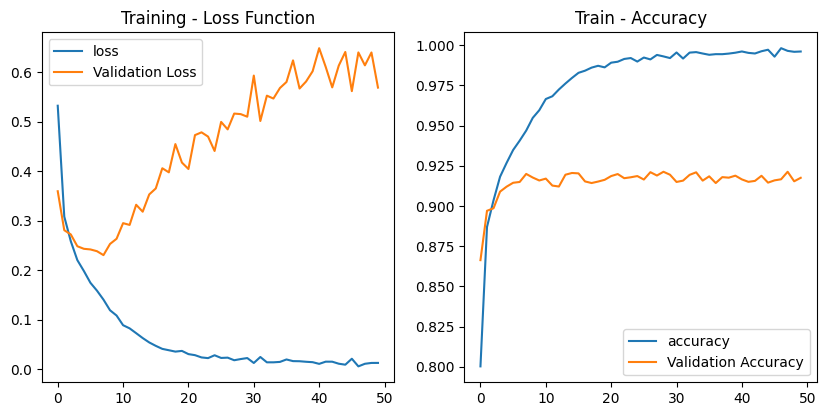

In [ ]:
# @title
# Plot the loss and accuracy functions for the training and validation sets

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
# @title
# get the predictions for the test data, converto an interger value between 0 and 9
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis=1)

#get the indices to be plotted
test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes==test_labels)[0]
incorrect = np.nonzero(predicted_classes!=test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


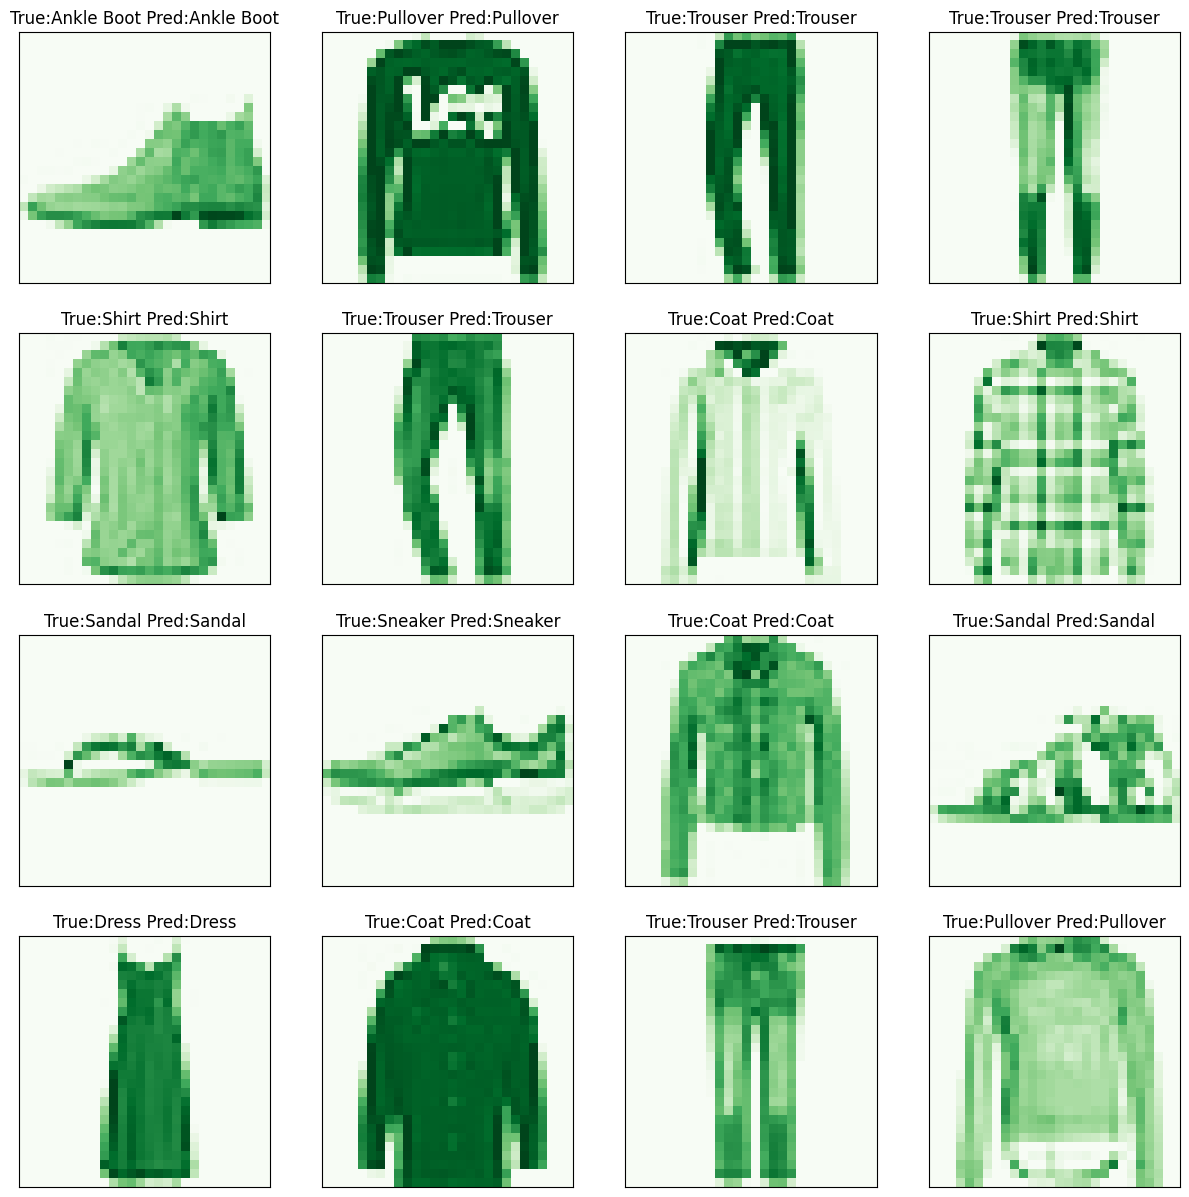

In [ ]:
# @title
# Plot 16 correctly predicted images and their labels.

plt.figure(figsize=(15,15))
for i, indx in enumerate(correct[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape the image before displaying it
    plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap= "Greens")
    label_index = train_labels[indx]
    plt.title("True:{} Pred:{}".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))
plt.show()

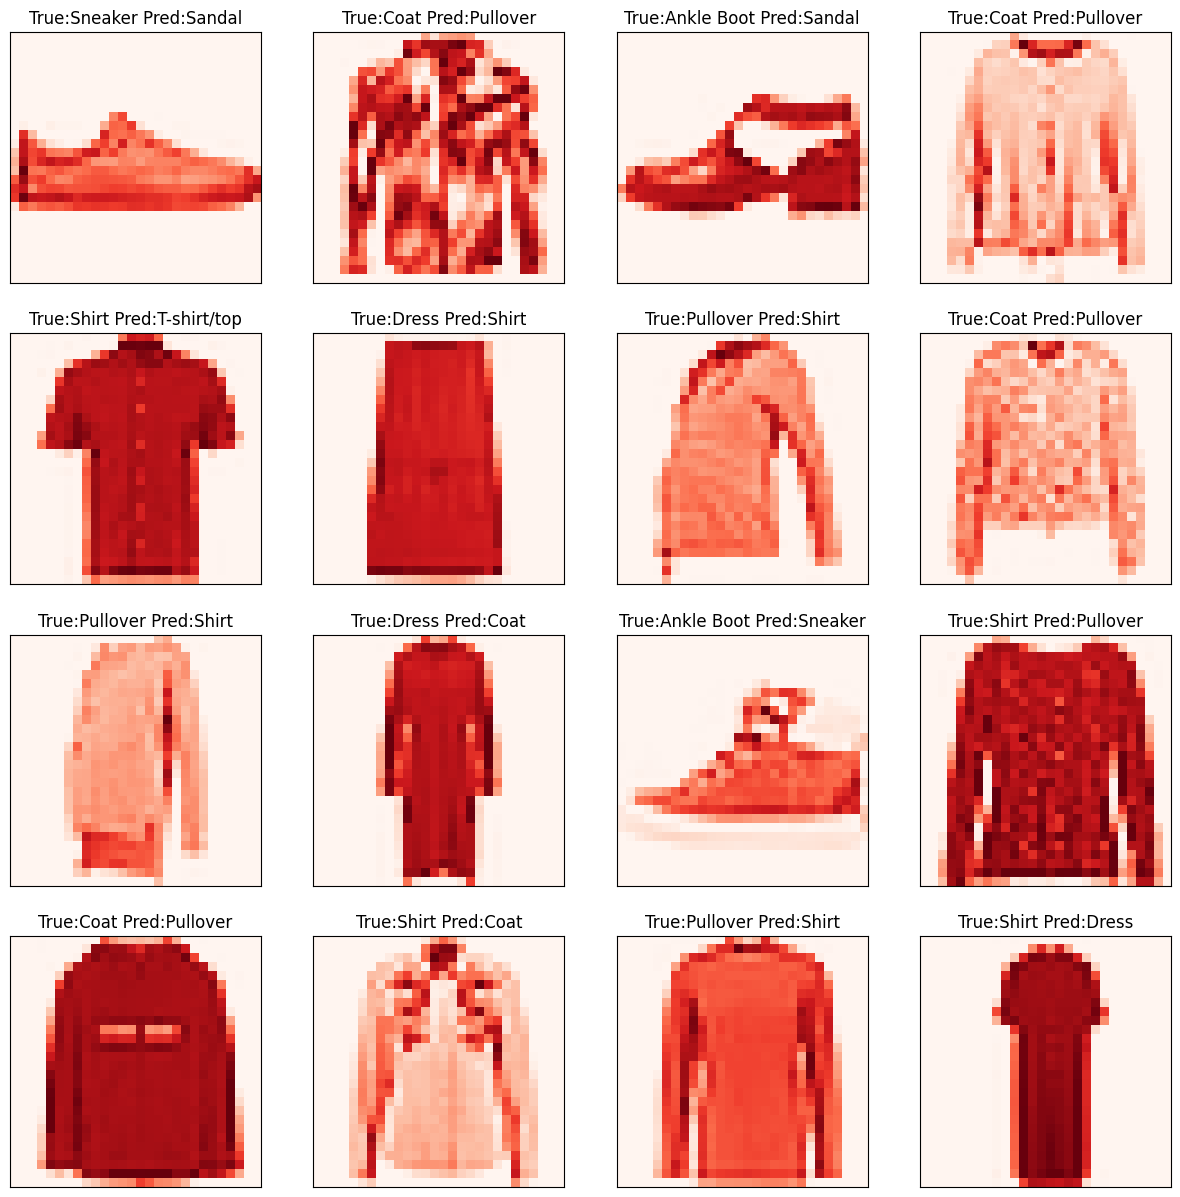

In [ ]:
# @title
# Plot 16 incorrectly predicted images and their labels.

plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape the image before displaying it
    plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap= "Reds")
    label_index = train_labels[indx]
    plt.title("True:{} Pred:{}".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))
plt.show()